In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import os

In [7]:
train_root=r"C:\Users\Ziyi\Desktop\5fold\train/" 
validation_root=r"C:\Users\Ziyi\Desktop\5fold\validation/"
validation_root=r"C:\Users\Ziyi\Desktop\5fold\validation/"

In [11]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)
train_dataset = train.flow_from_directory(train_root,
                                         target_size=(224,224),
                                         batch_size=8,
                                         class_mode="binary")
validation_dataset = validation.flow_from_directory(validation_root,
                                                   target_size=(224,224),
                                                   batch_size=8,
                                                   class_mode='binary')

Found 2436 images belonging to 2 classes.
Found 696 images belonging to 2 classes.


In [12]:
train_dataset.class_indices
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [13]:
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        if loss_type == 'epoch':
            # val_acc
            plt.subplot(1,2,1)
            plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            plt.grid(True)
            plt.xlabel(loss_type)
            plt.ylabel('acc')
            plt.legend(loc="lower right")
            # val_loss
            plt.subplot(1,2,2)
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
            plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
            plt.grid(True)
            plt.xlabel(loss_type)
            plt.ylabel('loss')
            plt.legend(loc="upper right")
        plt.show()

In [16]:
Alex = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
Alex.compile(loss="binary_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(lr=1e-3),
                     metrics =['accuracy'])
history_alex = LossHistory()

In [ ]:
history = Alex.fit(train_dataset,
                      batch_size=16,
                      epochs=50,
                      validation_data=validation_dataset,
                      callbacks=[history_alex])

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
305/305 [==============================] - 404s 1s/step - loss: 6.5013 - acc: 0.5944 - val_loss: 6.8317 - val_acc: 0.5761
Epoch 2/50
305/305 [==============================] - 430s 1s/step - loss: 6.5067 - acc: 0.5961 - val_loss: 6.8317 - val_acc: 0.5761
Epoch 3/50
286/305 [===========================>..] - ETA: 25s - loss: 6.4670 - acc: 0.5985

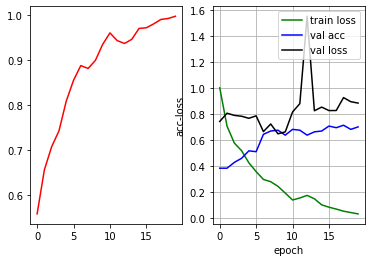

In [49]:
history1.loss_plot('epoch')

In [35]:
img_path = '10X_661.jpg'
img = image.load_img(img_path, target_size=(227, 227))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor = img_tensor/255

In [108]:
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers[0:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
first_layer_activation.shape

(1, 55, 55, 96)

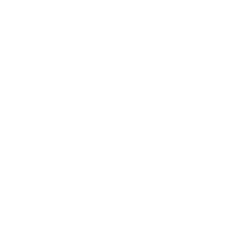

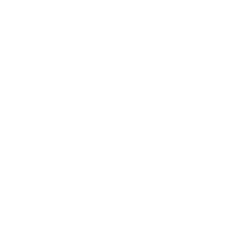

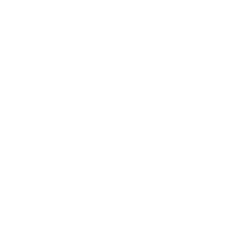

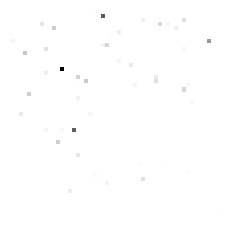

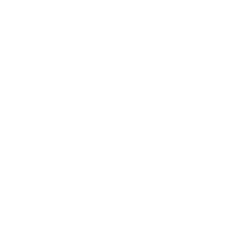

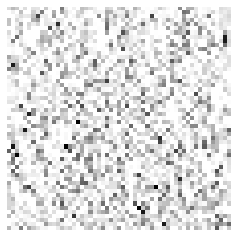

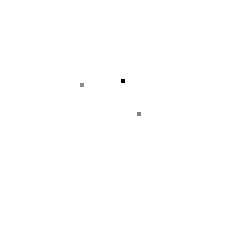

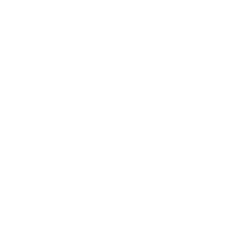

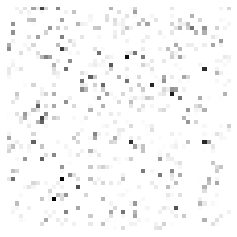

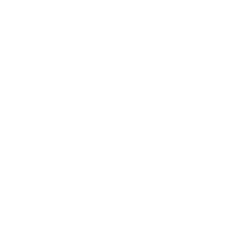

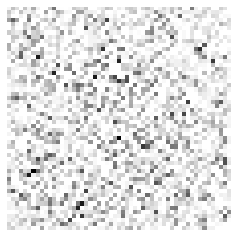

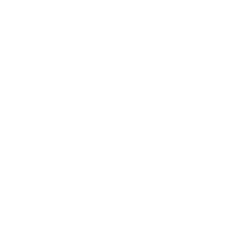

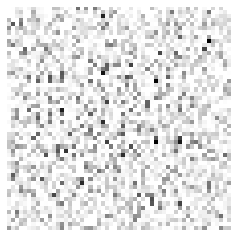

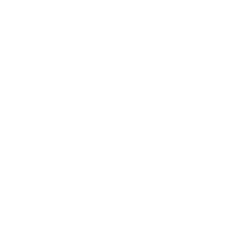

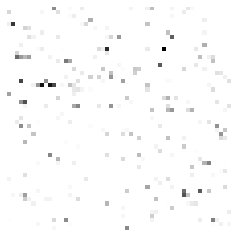

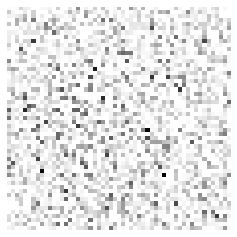

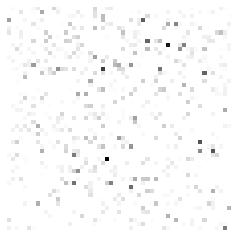

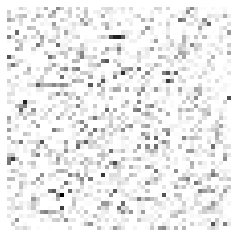

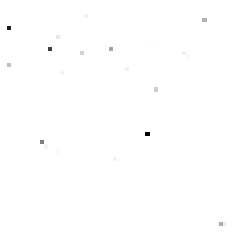

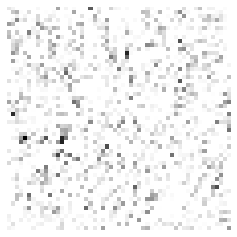

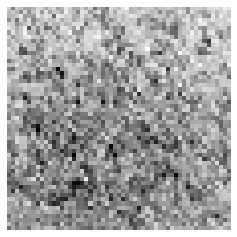

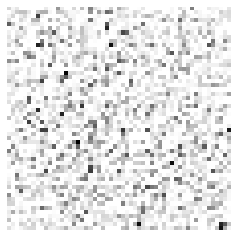

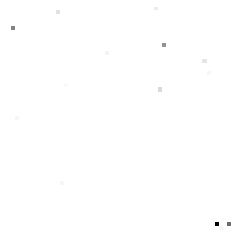

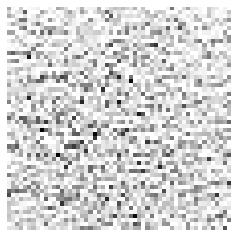

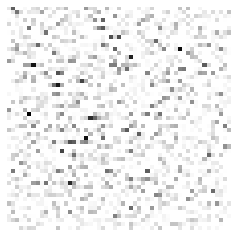

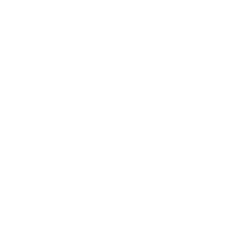

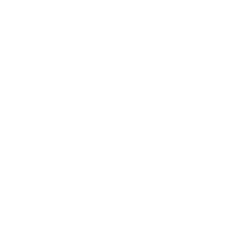

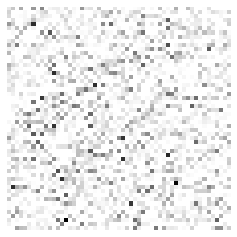

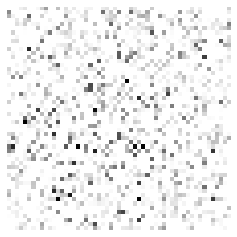

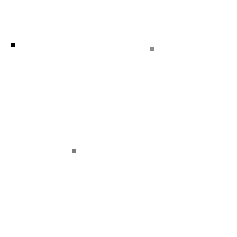

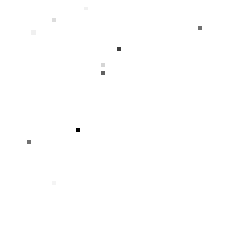

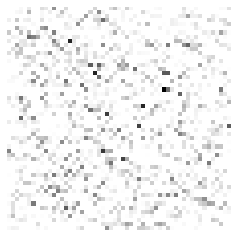

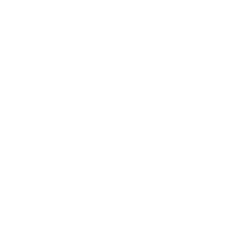

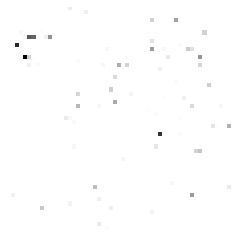

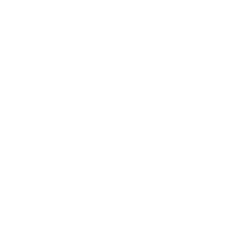

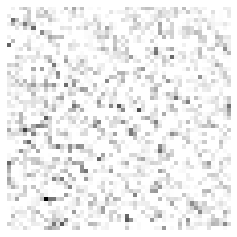

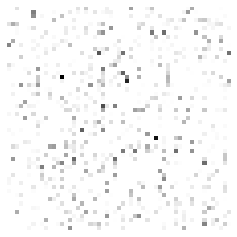

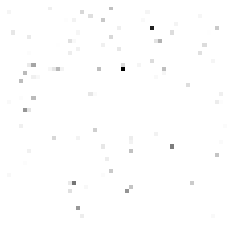

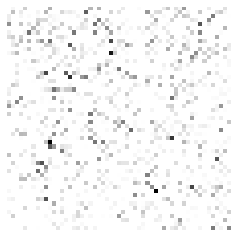

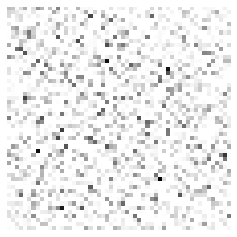

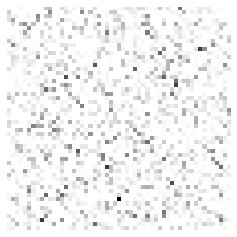

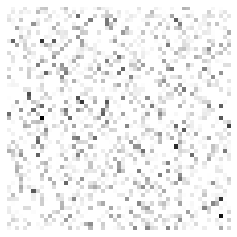

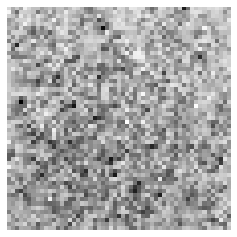

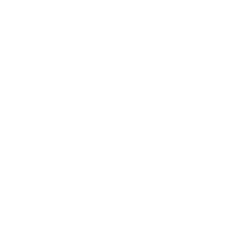

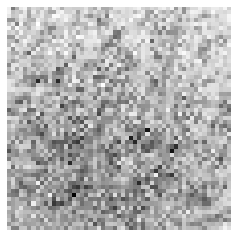

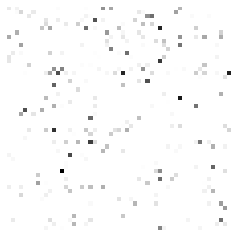

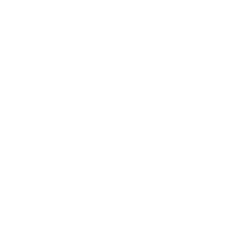

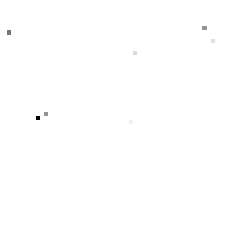

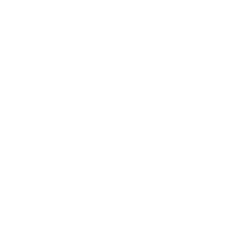

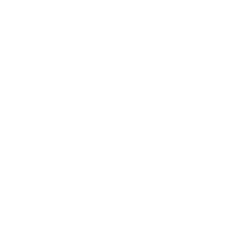

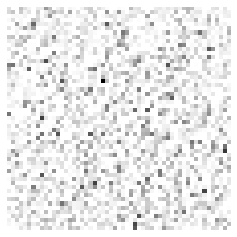

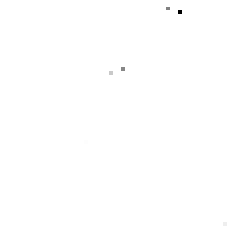

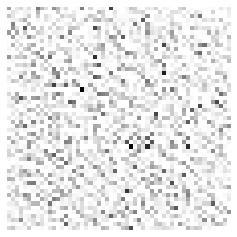

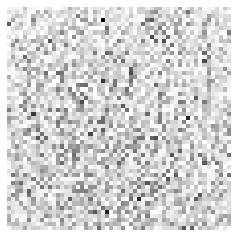

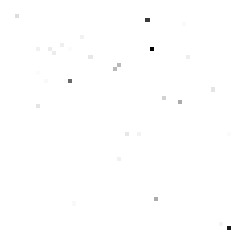

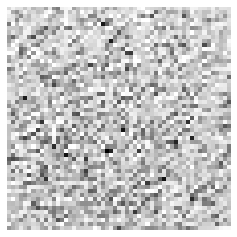

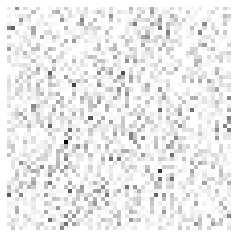

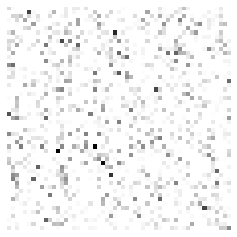

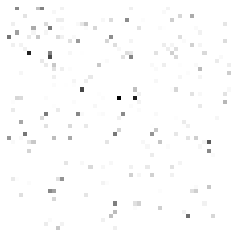

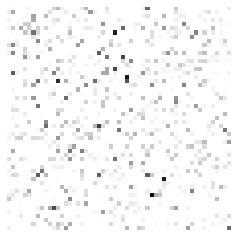

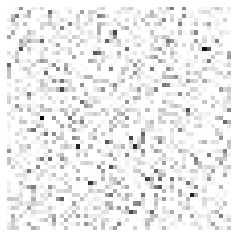

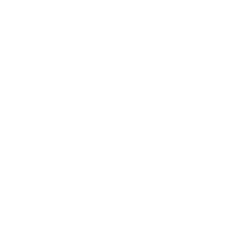

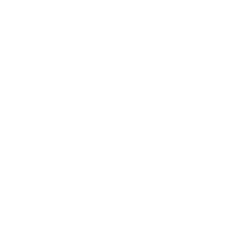

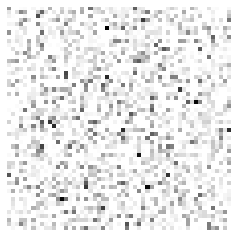

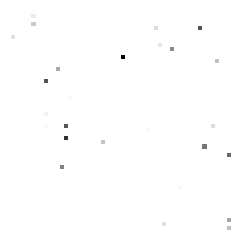

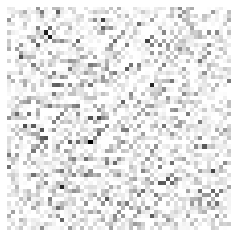

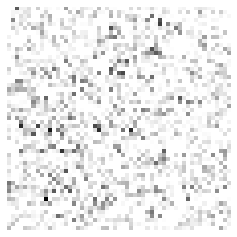

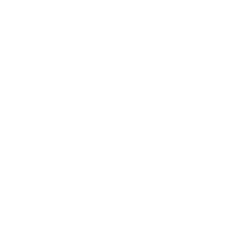

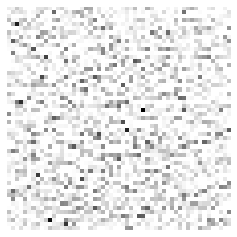

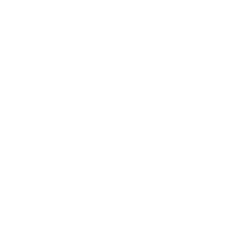

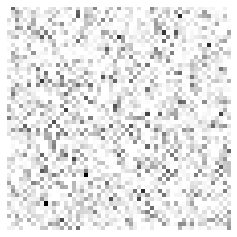

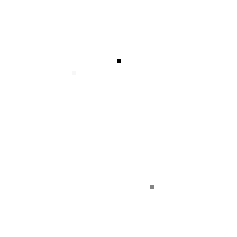

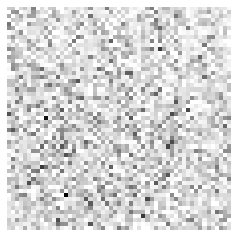

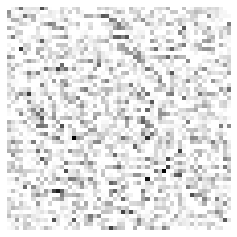

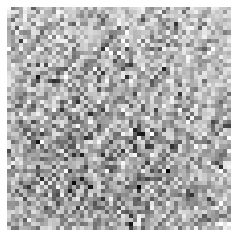

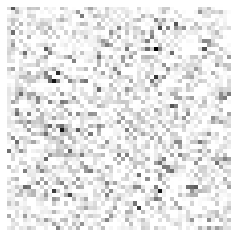

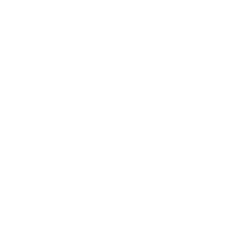

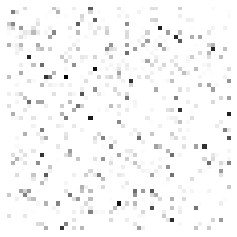

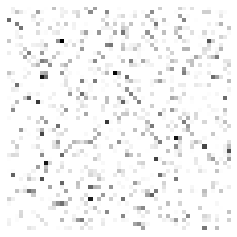

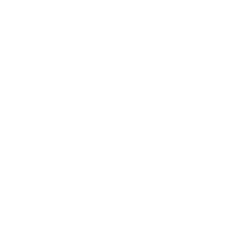

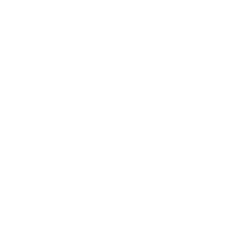

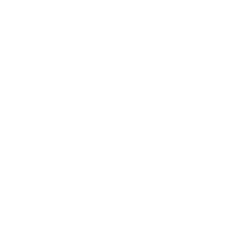

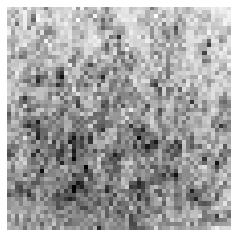

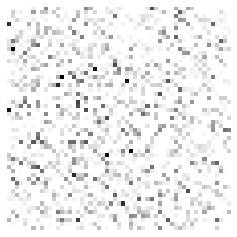

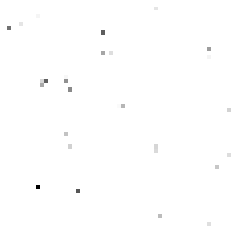

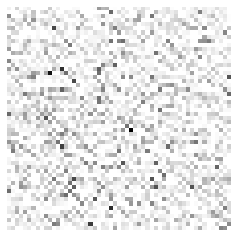

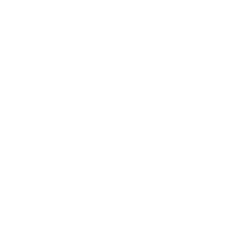

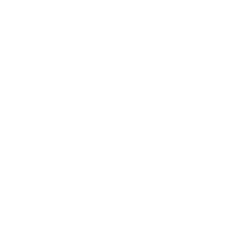

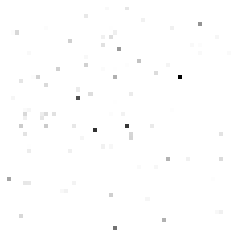

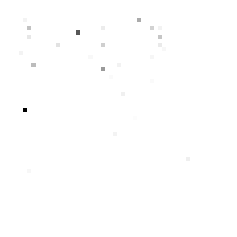

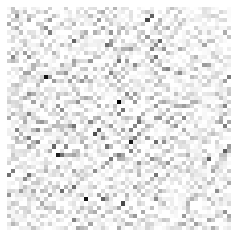

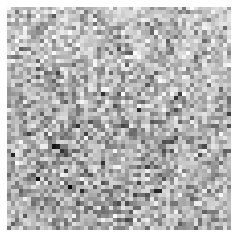

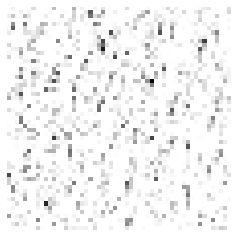

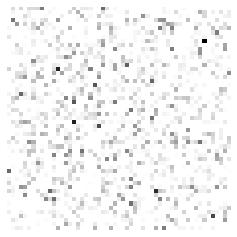

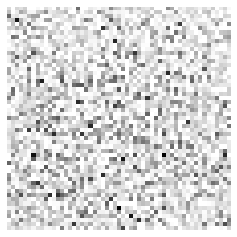

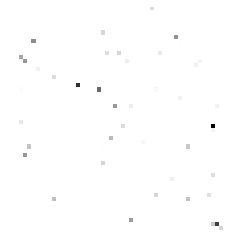

In [89]:
Pic = []
for i in range(first_layer_activation.shape[3]):
    plt.matshow(first_layer_activation[0, :, :, i], cmap='Greys')
    plt.axis("off")
    plt.savefig(os.path.join("Visualization",str(i)),bbox_inches='tight')
    plt.show()

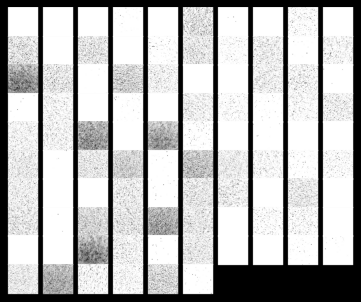

In [101]:
fig = plt.figure()
fig.patch.set_facecolor('black')
for i in range(96): 
    plt.subplot(10,10,i+1)   
    img = plt.imread(os.path.join('Visualization', str(i)+".png"))
    plt.imshow(img, cmap = 'gray')
    plt.axis('off')       
plt.tight_layout()
plt.subplots_adjust(bottom=0,top=1,left=0,right=1,
                    wspace=-0.7, 
                    hspace=-0.1)
plt.savefig(os.path.join('Visualization',"v.jpg") ,bbox_inches='tight')